![prob2](header.jpg)

### Problema 2

O serviço meteorológico fornece informações sobre a temperatura de cada dia nos últimos 50 anos na sua praia preferida: data, temperatura mínima, temperatura média, temperatura máxima. Você gostaria de obter as seguintes informações importantes para planejar suas férias:

  * Qual o mês com a maior média de temperaturas máximas;
  * Qual o mês com a maior média de temperaturas mínimas;
  * Qual o mês com a maior amplitude térmica;
  
Os registros estão em um arquivo com o seguinte formato:

```ini
#data precip maxima minima horas_insol temp_media um_relativa vel_vento
01/01/1961 -1 33.8 22.2 11.7 27.08 67.0 2.333333
02/01/1961 0.0 34.7 22.5 9.5 28.06 62.5 1.333333
03/01/1961 0.2 27.7 23.1 2.3 24.32 74.25 2.0
04/01/1961 2.4 29.4 20.6 8.7 23.56 57.5 2.333333
```

Cada linha contém as seguintes informações, em ordem: data, precipitação (em mm), temperatura máxima, temperatura mínima, horas de insolação, temperatura média, umidade relativa do ar (%) e velocidade do vento. Caso alguma informação não tenha sido coletada no dia, é utilizado o valor -1.


Populating the interactive namespace from numpy and matplotlib
Mínimas: [ 20.52149533  20.69786354  19.39398873  16.34229275  13.29411392
  10.8962585   10.52715969  11.41252433  13.11643287  15.36202771
  17.09785853  19.12231301]
Máximas: [ 30.54485981  30.26045549  28.71571697  25.68498382  22.33020899
  19.73399048  19.63718954  21.07948052  22.21413262  24.81944444
  27.14935065  29.48541798]
Amplitudes: [ 10.02336449   9.56259194   9.32172824   9.34269107   9.03609507
   8.83773198   9.11002986   9.66695618   9.09769975   9.45741674
  10.05149212  10.36310497]
Mês com menor média de temperatura mínima: 7 ( 10.5271596859 )
Mês com maior média de temperatura máxima: 1 ( 20.6978635424 )
Mês com maior amplitude térmica: 12 ( 10.3631049654 )


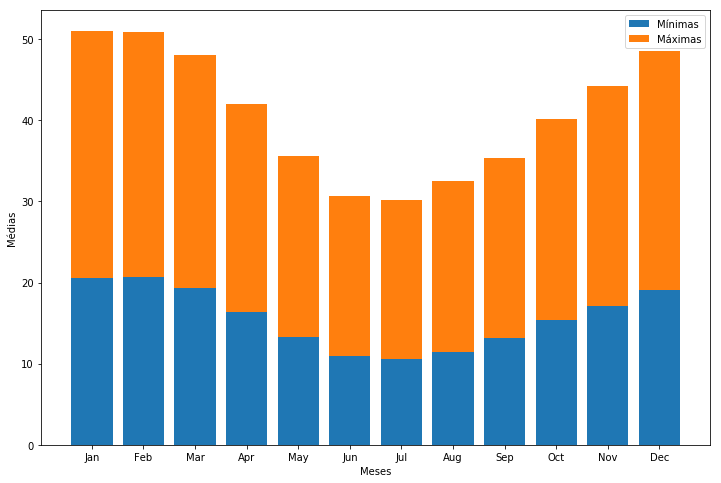

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import calendar
import numpy as np
import matplotlib.pyplot as plt

arq = open("dados/poa_temps.txt")
arq.readline() # Pula o cabeçalho

minimas = np.zeros(12)
maximas = np.zeros(12)
totminimas = np.zeros(12)
totmaximas = np.zeros(12)

for linha in arq.readlines():
    dados = linha.split()
    data = dados[0]
    maxima = float(dados[2])
    minima = float(dados[3])

    diamesano = data.split("/")
    mes = int(diamesano[1])-1

    # Há máxima?
    if maxima != -1:
        maximas[mes] += maxima
        totmaximas[mes] += 1

    # Há mínima?
    if minima != -1:
        minimas[mes] += minima
        totminimas[mes] += 1

arq.close()

mins = minimas/totminimas
print("Mínimas:",mins)

maxs = maximas/totmaximas
print("Máximas:",maxs)

ampli = maxs - mins
print("Amplitudes:",ampli)

mesMenor = mins.argmin()
mesMenorValor = mins.min()
mesMaior = maxs.argmax()
mesMaiorValor = mins.max()

ampliMaior = ampli.argmax()
ampliMaiorValor = ampli.max()

print("Mês com menor média de temperatura mínima:",mesMenor+1,"(",mesMenorValor,")")
print("Mês com maior média de temperatura máxima:",mesMaior+1,"(",mesMaiorValor,")")
print("Mês com maior amplitude térmica:",ampliMaior+1,"(",ampliMaiorValor,")")

meses = np.linspace(1,12,12) # 1, 2, 3..., 12
plt.xlabel("Meses")
plt.ylabel("Médias")
plt.xticks(range(1,13), calendar.month_abbr[1:13])
plt.bar(meses,mins,label="Mínimas")
plt.bar(meses,maxs,bottom=mins,label="Máximas")
plt.legend()
plt.show()